# FLood Forecasting


## Data Acquisition

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

In [230]:
data = pd.read_csv('/Users/ameny/Documents/CS485 Artifical Intelligence/Rain/pluviometrie (2).csv')
data

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente
0,2021-11-20,جندوبة,0.0,15.9,45.510000,89.0,109.744000,43.2,96.2
1,2021-11-20,بوسالم,0.0,16.2,45.786667,90.0,106.104445,54.5,82.9
2,2021-11-20,غار الدماء,0.0,7.8,46.614286,66.3,102.355102,17.3,53.9
3,2021-11-20,عين دراهم,0.0,58.0,202.260000,407.0,352.946000,104.0,332.0
4,2021-11-20,طبرقة,0.0,63.6,144.524000,285.2,255.266000,44.6,239.2
...,...,...,...,...,...,...,...,...,...
39281,2020-12-27,قلعة الأندلس,1.0,127.0,74.700000,291.0,177.123510,90.0,194.0
39282,2020-12-27,منوبة,1.5,86.5,54.600000,287.0,165.096898,65.5,255.0
39283,2020-12-27,برج العامري,1.0,81.0,55.100000,222.0,205.550000,51.5,155.5
39284,2020-12-27,البطان,0.0,68.0,52.900000,217.0,214.398139,67.0,172.0


## Data Cleaning

Defining the columns

In [231]:
df = pd.DataFrame(data, columns = ['Date','station', 'Cumul_periode', 'Cumul_periode_precedente'])
df

,Date,station,Cumul_periode,Cumul_periode_precedente
0,2021-11-20,جندوبة,89.0,96.2
1,2021-11-20,بوسالم,90.0,82.9
2,2021-11-20,غار الدماء,66.3,53.9
3,2021-11-20,عين دراهم,407.0,332.0
4,2021-11-20,طبرقة,285.2,239.2
...,...,...,...,...
39281,2020-12-27,قلعة الأندلس,291.0,194.0
39282,2020-12-27,منوبة,287.0,255.0
39283,2020-12-27,برج العامري,222.0,155.5
39284,2020-12-27,البطان,217.0,172.0


In [232]:
# check the data type of data frame "df" by .dtypes
print(df.dtypes)

Date                         object
station                      object
Cumul_periode               float64
Cumul_periode_precedente    float64
dtype: object


In [233]:
df.sort_values("station", inplace=True)
df

,Date,station,Cumul_periode,Cumul_periode_precedente
22873,2021-05-11,جومين,641.5,626.0
1284,2021-11-09,جومين,193.0,203.0
17830,2021-06-22,جومين,641.5,634.0
38444,2021-01-03,جومين,398.0,379.0
36845,2021-01-16,جومين,428.0,419.0
...,...,...,...,...
32967,2021-02-18,نفطة,16.0,29.0
20466,2021-06-01,نفطة,18.0,60.5
37144,2021-01-14,نفطة,16.0,29.0
1583,2021-11-07,نفطة,0.0,0.0


In [234]:
df.drop_duplicates(keep=False,inplace=True)
df

,Date,station,Cumul_periode,Cumul_periode_precedente
22873,2021-05-11,جومين,641.5,626.0
1284,2021-11-09,جومين,193.0,203.0
17830,2021-06-22,جومين,641.5,634.0
38444,2021-01-03,جومين,398.0,379.0
36845,2021-01-16,جومين,428.0,419.0
...,...,...,...,...
32967,2021-02-18,نفطة,16.0,29.0
20466,2021-06-01,نفطة,18.0,60.5
37144,2021-01-14,نفطة,16.0,29.0
1583,2021-11-07,نفطة,0.0,0.0


In [235]:
#Check if there are NaN values
nonapplicablevalues_periode=np.any(np.isnan(df['Cumul_periode']))
print(nonapplicablevalues_periode)

nonapplicablevalues_periodeprecedente=np.any(np.isnan(df['Cumul_periode_precedente']))
print(nonapplicablevalues_periodeprecedente)


False
True


In [236]:
#Replace NaN Values with Zeros 
df['Cumul_periode_precedente']=df['Cumul_periode_precedente'].fillna(0.0)

nonapplicablevalues_periodeprecedente=np.any(np.isnan(df['Cumul_periode_precedente']))
print(nonapplicablevalues_periodeprecedente)

False


## Data Visualization

In [237]:
total_precip1 = df['Cumul_periode_precedente'].groupby(df['station'])
print(total_precip1.mean())

station
 جومين               457.451104
أريانة               419.388715
أم العرائس            77.484227
البطان               231.493730
الجبيبنة 3 النظور    235.392744
                        ...    
نابل                 273.243711
نفزة                  43.482759
نفزة                 532.600000
نفطة                   0.000000
نفطة                  40.605536
Name: Cumul_periode_precedente, Length: 158, dtype: float64


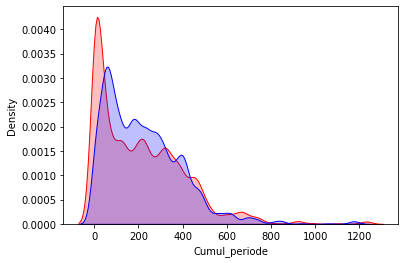

In [238]:
fig = sns.kdeplot(df['Cumul_periode'], shade=True, color="r")
fig = sns.kdeplot(df['Cumul_periode_precedente'], shade=True, color="b")
plt.show()

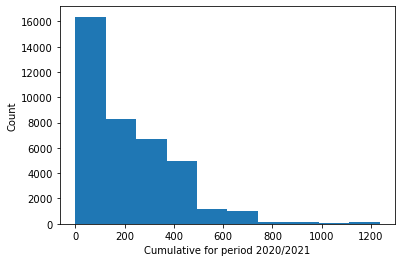

In [239]:
plt.hist(df['Cumul_periode'])
# set x/y labels and plot title
plt.xlabel("Cumulative for period 2020/2021")
plt.ylabel("Count")
plt.savefig('Cumulative20202021.png')

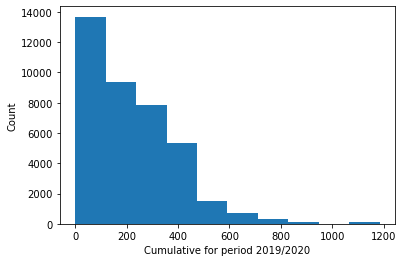

In [240]:
plt.hist(df['Cumul_periode_precedente'])
# set x/y labels and plot title
plt.xlabel("Cumulative for period 2019/2020")
plt.ylabel("Count")
plt.savefig('Cumulative20192020.png')

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [241]:
bins = np.linspace(min(df["Cumul_periode"]), max(df["Cumul_periode"]), 4)
bins

array([   0.        ,  411.66666667,  823.33333333, 1235.        ])

In [242]:
group_names = ['Low', 'Medium', 'High']

In [243]:
df['Cumul_periode-binned'] = pd.cut(df['Cumul_periode'], bins, labels=group_names, include_lowest=True )
df[['Cumul_periode','Cumul_periode-binned']].head(10)

,Cumul_periode,Cumul_periode-binned
22873,641.5,Medium
1284,193.0,Low
17830,641.5,Medium
38444,398.0,Low
36845,428.0,Medium
31930,514.0,Medium
21151,641.5,Medium
25881,602.5,Medium
3858,86.0,Low
423,206.0,Low


In [244]:
df['Cumul_periode_precedente-binned'] = pd.cut(df['Cumul_periode_precedente'], bins, 
labels=group_names, include_lowest=True )
df[['Cumul_periode_precedente','Cumul_periode_precedente-binned']].head(10)

,Cumul_periode_precedente,Cumul_periode_precedente-binned
22873,626.0,Medium
1284,203.0,Low
17830,634.0,Medium
38444,379.0,Low
36845,419.0,Medium
31930,419.0,Medium
21151,626.0,Medium
25881,576.0,Medium
3858,199.0,Low
423,209.0,Low


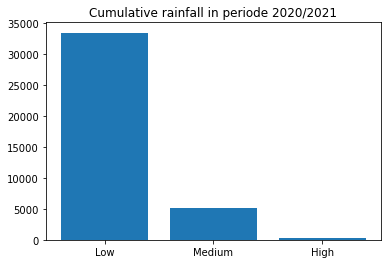

In [245]:
plt.bar(group_names, df["Cumul_periode-binned"].value_counts())
plt.title('Cumulative rainfall in periode 2020/2021')
plt.savefig('20202021.png')

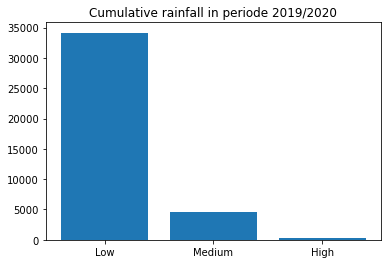

In [246]:
plt.bar(group_names, df["Cumul_periode_precedente-binned"].value_counts())
plt.title('Cumulative rainfall in periode 2019/2020')
plt.savefig('20192020.png')

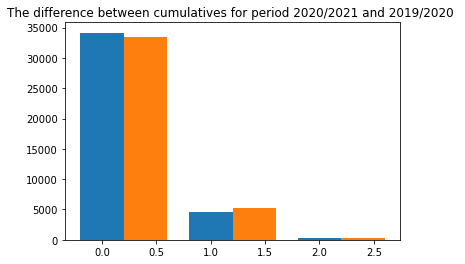

In [247]:
w=0.4

bar1=np.arange(len(group_names))
bar2=[i+w for i in bar1]

plt.bar(bar1,df["Cumul_periode_precedente-binned"].value_counts(),w)
plt.bar(bar2, df["Cumul_periode-binned"].value_counts(),w)
plt.title('The difference between cumulatives for period 2020/2021 and 2019/2020 ')
plt.savefig('difference.png')
plt.show()